# Data-Driven Marketing: How to Allocate Your Budget Wisely

## Table of Contents <a id='back'></a>

* [Introduction](#intro)
    * [Objective](#tujuan)
    * [Project Phases](#tahap)
* [Phase 1: Loading Data](#data1)
    * [Importing Libraries](#lib)
    * [Loading Data](#data2)
* [Phase 2: Data Exploration](#explore)
    * [Dataset Visits](#visits)
    * [Dataset Orders](#orders)
    * [Dataset Costs](#costs)
* [Phase 3: Data Preprocessing](#pra)
    * [Renaming Columns](#name)
    * [Identifying Anomalies](#anomali)
* [Phase 4: Data Analysis](#analysis)
    * [Product Analysis](#produk)
        * [How many people use the product daily, weekly, and monthly?](#produk1)
        * [How many sessions are there per day?](#produk2)
        * [What is the average session duration?](#produk3)
        * [How frequently do users return to the product?](#produk4)
    * [Sales Analysis](#penjualan)
        * [When do customers start making purchases?](#penjualan1)
        * [How many orders do they place over time?](#penjualan2)
        * [What is the average purchase value?](#penjualan3)
        * [How much revenue do they contribute? (LTV)](#penjualan4)
    * [Marketing Analysis](#pemasaran)
        * [How much money is spent overall and per source?](#pemasaran1)
        * [What is the Customer Acquisition Cost (CAC) for each source?](#pemasaran2)
        * [How profitable is the investment? (ROMI)](#pemasaran3)
* [Analysis Summary](#end)

## Introduction <a id='intro'></a>

This analysis focuses on helping the company Y.Afisha optimize its marketing budget by examining three key metrics: product usage, sales performance, and marketing effectiveness. By identifying the most effective marketing channels, Y.Afisha can allocate their budget more efficiently and achieve better results.

The analysis covers three main areas:

1. Product Usage: Understanding user behavior, including how many people use the product, session counts, session duration, and user retention.
2. Sales Performance: Analyzing customer purchasing habits, such as when purchases start, the number of orders over time, average order value, and customer lifetime value (LTV).
3. Marketing Effectiveness: Evaluating marketing spend, customer acquisition costs (CAC), and return on marketing investment (ROMI).

By combining insights from these metrics, Y.Afisha aims to identify the most optimal marketing channels for investment.

### Objective: <a id='tujuan'></a>

The primary goal of this analysis is to determine the most effective marketing sources using the following metrics:

- Product Usage:
    - Daily, weekly, and monthly active users.
    - Number of sessions per day.
    - Average session duration.
    - User retention rates.

- Sales Performance:
    - Timing of the first purchase.
    - Number of orders placed over time.
    - Average purchase value.
    - Total revenue contribution (LTV).

- Marketing Effectiveness:
    - Total and per-source marketing spend.
    - Customer acquisition cost (CAC) by source.
    - Profitability of marketing investments (ROMI).


### Project Phases: <a id='tahap'></a>
 
This project is divided into four main phases:

1. Loading Data: Importing libraries and datasets.
2. Data Exploration: Examining the datasets for initial insights.
3. Data Preprocessing: Preparing the data by renaming columns and identifying anomalies.
4. Data Analysis: Analyzing product, sales, and marketing metrics to determine the most effective marketing channels.

## Phase 1: Loading Data <a id='data1'></a>

### Importing Libraries <a id='lib'></a>

In [215]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

### Loading Data <a id='data2'></a>

In [216]:
# Load the first dataset
try:
    visits = pd.read_csv(
        'moved_visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
        )
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
        )

In [217]:
# Load the second dataset
try:
    orders = pd.read_csv(
        'moved_orders_log_us.csv',
        parse_dates=['Buy Ts']
        )
except:
    orders = pd.read_csv(
        '/datasets/orders_log_us.csv',
        parse_dates=['Buy Ts']
    )

In [218]:
# Load the last dataset
try:
    costs = pd.read_csv(
        'moved_costs_us.csv',
        parse_dates=['dt']
        )
except:
    costs = pd.read_csv(
        '/datasets/costs_us.csv',
        parse_dates=['dt']
        )

##  Phase 2: Data Exploration <a id='explore'></a>

###  Dataset `visits`  <a id='visits'></a>

The `visits` table contains server log data recording website visits. It includes the following columns:

- `Uid` — User ID.
- `Device ` — The device used by the user.
- `Start Ts` — The date and time when the session started.
- `End Ts` — The date and time when the session ended.
- `Source Id` — The ID of the advertising source or platform that directed the user to the website.

In [219]:
# Viewing the first 5 rows of the dataset
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [220]:
# Checking the size of the dataset
visits.shape

(359400, 5)

In [221]:
# Getting a summary of the dataset
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [222]:
# Viewing descriptive statistics of the data
visits.describe()

,End Ts,Source Id,Start Ts,Uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


In [223]:
# Counting missing values in the dataset
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [224]:
# Checking for duplicate entries in the data
visits.duplicated().sum()

0

**Findings:**

Each row in the table contains detailed server log information about website visits, including user ID, device type, session start and end timestamps, and the advertising source ID that directed users to the site.

From the analysis, we observed the following:

- The dataset consists of **359,400** rows and **5** columns.
- Column names need to be updated for better readability and easier code usage.
- While loading the data, the `Device` column was converted to the `category` data type to reduce memory usage.
- Similarly, the `Start Ts` and `End Ts` columns were converted to the `datetime64[ns]` data type during data loading for easier date and time handling.

###  Dataset `orders`  <a id='orders'></a>

The `orders` table contains data related to customer orders, with the following columns:

- `Uid` — The user ID of the customer who placed the order.
- `Buy Ts` — The date and time when the order was placed.
- `Revenue` — The revenue generated for Y.Afisha from the order.

In [225]:
# Viewing the first 5 rows of the dataset
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [226]:
# Checking the size of the dataset
orders.shape

(50415, 3)

In [227]:
# Getting a summary of the dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [228]:
# Viewing descriptive statistics of the data
orders.describe()

,Buy Ts,Revenue,Uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


In [229]:
# Counting missing values in the dataset
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [230]:
# Checking for duplicate entries in the data
orders.duplicated().sum()

0

**Findings:**

Each row in the table contains detailed information about customer orders, including the user ID of the customer who placed the order, the date and time when the order was made, and the revenue generated for Y.Afisha from the order.

From the analysis, we observed the following:

- The dataset consists of **50,415** rows and **3** columns.
- Column names should be updated to improve readability and ease of coding.
- While loading the data, the `Buy Ts` column was converted to the `datetime64[ns]` data type for easier handling of date and time values.

###  Dataset `cost`  <a id='costs'></a>

Tabel `costs` berisikan informasi terkait pengeluaran pemasaran dengan kolom sebagai berikut:

- `source_id` — ID sumber iklan.
- `dt` — Tanggal.
- `costs ` — Pengeluaran untuk sumber iklan pada tanggal tersebut.

In [231]:
# Viewing the first 5 rows of the dataset
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [232]:
# Checking the size of the dataset
costs.shape

(2542, 3)

In [233]:
# Getting a summary of the dataset
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [234]:
# Viewing descriptive statistics of the data
costs.describe()

,source_id,dt,costs
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


In [235]:
# Counting missing values in the dataset
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [236]:
# Checking for duplicate entries in the data
costs.duplicated().sum()

0

**Findings:**

Each row in the table contains detailed information about advertising data, including the advertising source ID, the date, and the expenses incurred for that source on the specified date.

From the analysis, we observed the following:

- The dataset consists of **2,542** rows and **3** columns.
- While loading the data, the `dt` column was converted to the `datetime64[ns]` data type for easier date handling.

## Phase 3: Data Preprocessing <a id='pra'></a>

### Renaming Columns <a id='name'></a>

The column names were standardized by converting them to **lowercase** and using **snake_case** format to make the coding process easier.

In [237]:
# Renaming columns in the 'visits' dataset
visits.columns = ['device', 'session_end', 'source_id', 'session_start', 'uid']

In [238]:
# Renaming columns in the 'orders' dataset
orders.columns = ['buy_ts', 'revenue', 'uid']

### Identifying Anomalies <a id='anomali'></a>


Before proceeding with the analysis, it's important to identify and address any anomalies in the data:

In [239]:
# Identifying anomalies
visits[visits['session_start'] > visits['session_end']]

,device,session_end,source_id,session_start,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Anomalies were found in the data: 2 rows had `session_start` values greater than `session_end`. This is unusual because the session start time should always precede the session end time.

Since there are only 2 rows with this anomaly, they can be removed:

In [240]:
# Removing anomalies
visits = visits[visits['session_start'] <= visits['session_end']]

**Preliminary Conclusions:**

- Column names in the dataset have been converted to **lowercase** and **snake_case**.
- Two anomalous rows were identified and subsequently removed from the dataset.

## Phase 4: Data Analysis <a id='analysis'></a>

### Product Analysis <a id='produk'></a>


The first metric to be analyzed is product, where we will explore the following aspects:
- How many people use the product daily, weekly, and monthly?
- How many sessions are there per day?
- What is the average session duration?
- How frequently do users return to the product?

#### How many people use the product daily, weekly, and monthly? <a id='produk1'></a>

In [241]:
# Reviewing the 'visits' dataset
visits.head()

,device,session_end,source_id,session_start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Since we aim to find the number of users interacting daily, weekly, and monthly, we need to extract specific time-based information from the data.

In [242]:
# Extracting time-related information

# Extracting the year of the session
visits['session_year'] = visits['session_start'].values.astype('datetime64[Y]')

# Extracting the month of the session
visits['session_month'] = visits['session_start'].values.astype('datetime64[M]')

# Extracting the week of the session
visits['session_week'] = visits['session_start'].values.astype('datetime64[W]')

# Extracting the date of the session
visits['session_date'] = visits['session_start'].values.astype('datetime64[D]')

In [243]:
# Viewing the updated dataset
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [244]:
# Calculating the number of Daily Active Users (DAU)
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

# Calculating the number of Weekly Active Users (WAU)
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()

# Calculating the number of Monthly Active Users (MAU)
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

# Displaying the results
print('The average number of daily active users is', int(dau_total), 'users')
print('The average number of weekly active users is', int(wau_total), 'users')
print('The average number of monthly active users is', int(mau_total), 'users')

The average number of daily active users is 907 users
The average number of weekly active users is 5724 users
The average number of monthly active users is 23228 users


**Findings:**

- The average number of users interacting with the product daily is **907** users.
- The average number of users interacting with the product weekly is **5,825** users.
- The average number of users interacting with the product monthly is **23,228** users.

These findings provide valuable insights into how frequently users engage with the product and can serve as a foundation for developing marketing strategies and improving the product. This information helps the company:

- Strengthen and enhance relationships with loyal users.
- Attract more new users by adjusting or improving product features and functionalities.
- Assess product performance and growth trends.

By understanding user engagement patterns, the company can make data-driven decisions to optimize user retention and acquisition strategies effectively.

#### How many sessions are there per day? <a id='produk2'></a>

In [245]:
# Reviewing the 'visits' dataset
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [246]:
# Creating a dataset for sessions per user
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'uid': ['count', 'nunique']}
)

# Renaming the columns for better clarity
sessions_per_user.columns = ['n_sessions', 'n_users']

# Calculating the number of sessions per user
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

In [247]:
# Displaying the resulting dataset
sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017-01-01   2017-06-01          16505    13259           1.244815
             2017-07-01          17828    14183           1.256998
             2017-08-01          14355    11631           1.234202
             2017-09-01          23907    18975           1.259921
             2017-10-01          37903    29692           1.276539
             2017-11-01          43969    32797           1.340641
             2017-12-01          41983    31557           1.330386
2018-01-01   2018-01-01          36939    28716           1.286356
             2018-02-01          37182    28749           1.293332
             2018-03-01          35677    27473           1.298620
             2018-04-01          26515    21008           1.262138
             2018-05-01          26635    20701           1.286653

<Axes: xlabel='session_year,session_month'>

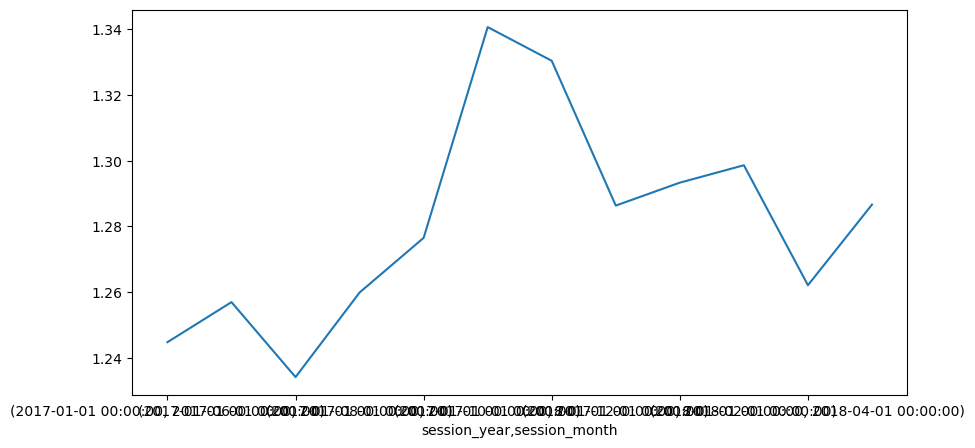

In [248]:
# Plotting the sessions per user as a line graph
sessions_per_user['sessions_per_user'].plot(kind='line', figsize=(10,5))

**Explanation:**

1. Grouping by Year and Month:

    The data is grouped by session_year and session_month to aggregate the number of sessions and unique users (n_sessions and n_users).

2. Calculating Sessions Per User:

    The sessions_per_user column calculates the average number of sessions each user had during the specified time periods.

3. Visualization:

    A line graph is plotted to visualize the trend of sessions per user over time, providing insights into user engagement patterns.

This approach gives a clear understanding of how frequently users engage with the product each month and highlights changes in user behavior over time.

**Findings:**

1. Steady Growth in Sessions and Users:

- From June 2017 to December 2017, the number of sessions (n`_sessions`) and users (`n_users`) steadily increased.
- This growth indicates a successful strategy during the second half of 2017, potentially due to marketing efforts or product improvements.

2. Sessions Per User Trend:

- The average sessions per user (`sessions_per_user`) gradually increased over time, starting at **1.24** in June 2017 and reaching its peak at **1.34** in November 2017.
- This suggests increasing user engagement, as users are returning more frequently within a given month.

3. Seasonal Variation:

- Engagement slightly declined from December 2017 into the first half of 2018. For instance, in April and May 2018, the sessions per user dropped to 1.26 and 1.28, respectively.
- This decline might reflect seasonal changes in user activity or external factors impacting product usage.

4. Most Active Period:

- November 2017 had the highest user engagement, with **43,969** sessions, **32,797** users, and an average of **1.34** sessions per user.
- This could coincide with seasonal events or campaigns, such as holiday promotions.

5. Slight Drop in Engagement:

- Although the number of sessions and users remained relatively high in early 2018, the average sessions per user did not reach the same levels as late 2017. This could indicate a need to analyze retention strategies or improve features to maintain higher engagement.

The data highlights a period of strong growth and engagement in late 2017, followed by a slight decline in early 2018. These trends suggest potential seasonal effects and opportunities for further investigation into what drove user engagement during peak months.

#### What is the average session duration? <a id='produk3'></a>

In [249]:
# Reviewing the 'visits' dataset
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [250]:
# Calculating session duration in seconds
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds

In [251]:
# Reviewing the updated dataset
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [252]:
# Descriptive statistics for session duration
visits['session_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

<Axes: >

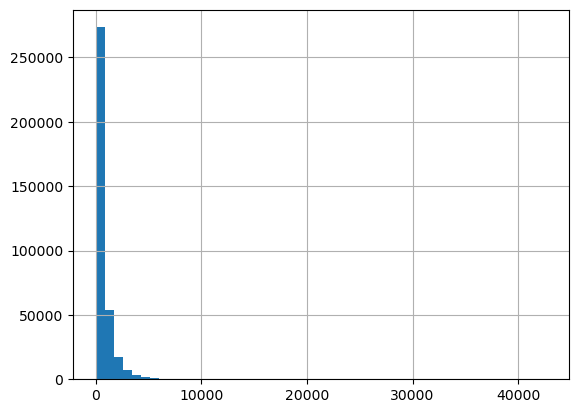

In [253]:
# Visualizing the session duration distribution
visits['session_duration_sec'].hist(bins=50) 

In [254]:
# Summary statistics
print('The average session duration is', round(visits['session_duration_sec'].mean()), 'seconds')
print('The median session duration is', round(visits['session_duration_sec'].median()), 'seconds')
print('The mode session duration is', round(visits['session_duration_sec'].mode()[0]), 'seconds')

The average session duration is 643 seconds
The median session duration is 300 seconds
The mode session duration is 60 seconds


**Findings:**

1. Descriptive Statistics:

- The average session duration is 643 seconds (~10 minutes).
- The median session duration is 300 seconds (5 minutes).
- The most common session duration (mode) is 60 seconds (1 minute).

2. Distribution of Session Durations:

- The histogram reveals a right-skewed distribution, where most sessions are short, with a significant number clustered around 60 seconds.
- A smaller proportion of sessions have much longer durations, contributing to the higher average.

3. Insights:

- The difference between the average and median suggests a small subset of very long sessions, likely from highly engaged users.
- The high frequency of 60-second sessions may indicate users quickly exiting or performing a single action before leaving.

4. Recommendations:

- **Improve User Retention:** Explore why a significant number of sessions end after 60 seconds. This might involve optimizing landing pages or onboarding flows.
- **Enhance Engagement Features:** Use the insights from longer sessions to understand what features keep users engaged and consider replicating or promoting those aspects across the platform.
- **Targeted Strategies:** Tailor marketing or feature enhancements toward retaining users who typically have shorter sessions, as converting them to more active users could substantially increase overall engagement.

The session duration analysis highlights an opportunity to understand both quick-exit behavior and the factors driving longer engagement. These insights can guide improvements to the user experience and product features, ultimately enhancing overall platform performance.

#### How frequently do users return to the product? <a id='produk4'></a>

Before analyzing user retention, it is necessary to extract information about each user's first session. This information will be stored in a new dataset called `first_visits`.

In [255]:
# Creating a new dataset for first visits
first_visits = visits.groupby('uid').agg({'session_start': 'min'}).reset_index()

# Renaming columns
first_visits.columns = ['uid', 'first_session_start']

In [256]:
# Previewing the dataset
first_visits.head()

,uid,first_session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [257]:
# Extracting additional time-related information

# Extracting date information
first_visits['first_session_date'] = first_visits['first_session_start'].values.astype('datetime64[D]')

# Extracting week information
first_visits['first_session_week']  = first_visits['first_session_start'].values.astype('datetime64[W]')

# Extracting month information
first_visits['first_session_month'] = first_visits['first_session_start'].values.astype('datetime64[M]')

# Extracting year information
first_visits['first_session_year']  = first_visits['first_session_start'].values.astype('datetime64[Y]')

In [258]:
# Previewing the enriched dataset
first_visits.head()

,uid,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01


Merge the `first_visits` dataset with the `visits` dataset and put them into a new `visits_merge` dataset.

In [259]:
# Merging first_visits with visits to create a combined dataset
visits_merge = pd.merge(visits, first_visits, on='uid')

# Calculating the time difference (age) between the first and subsequent sessions
visits_merge['age_days'] = (visits_merge['session_date'] - visits_merge['first_session_date']).dt.days
visits_merge['age_months'] = round(visits_merge['age_days'] / 30).astype('int')

In [260]:
# Previewing the merged dataset
visits_merge.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,0


In [261]:
# Creating a cohort analysis table
cohorts = visits_merge.pivot_table(
    index='first_session_month',
    columns='age_months',
    values='uid',
    aggfunc='nunique'
)

In [262]:
# Filling empty values with blanks
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [263]:
# Calculating retention rates
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

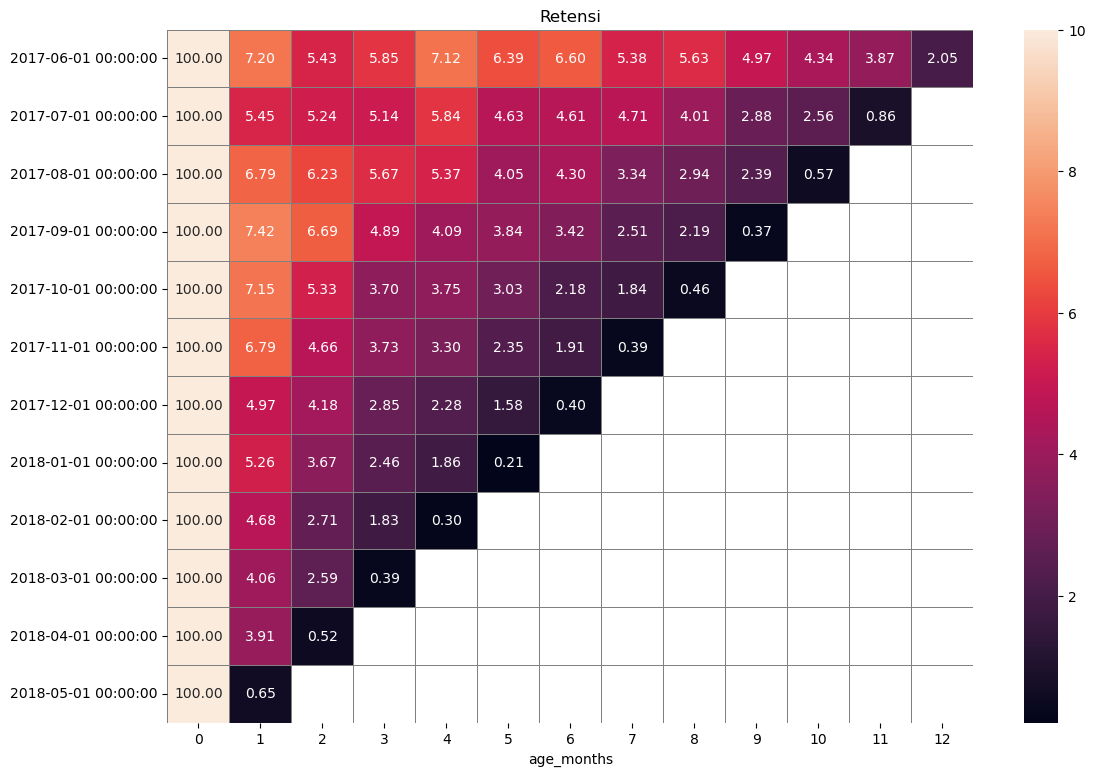

In [264]:
# Visualizing retention rates
plt.figure(figsize=(13, 9))
plt.title('Retensi')
sns.heatmap(
    retention,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    linecolor='grey',
    vmax=10
);

In [265]:
# Calculating the average retention rate
retention.mean()

age_months
0     100.000000
1       5.361101
2       4.294895
3       3.649332
4       3.768995
5       3.259808
6       3.344964
7       3.029164
8       3.045381
9       2.651628
10      2.492865
11      2.364520
12      2.051437
dtype: float64

**Findings:**

1. Initial Engagement:

- The first month retention rate is significantly high at **100%**, which reflects the total number of users during their first session (baseline value).
- However, there is a steep drop-off in retention after the first month, with only **5.36%** of users on average returning for the second month.

2. Retention Trends:

- The retention rate decreases progressively over time, with only about **2.05%** of users returning in their 12th month.
- This downward trend is typical for many digital products, where user engagement declines without active re-engagement strategies.

3. Cohort Observations:

- Larger cohorts (e.g., **June 2017, November 2017**) tend to retain a greater absolute number of users, even though their retention percentages align with other months.
- Smaller cohorts (e.g., **April 2018, May 2018**) exhibit lower retention, partly due to their smaller user base.

4. Longevity of Engagement:

- A small percentage of users remain engaged beyond **9-12 months**, demonstrating a core loyal audience. This group can be valuable for identifying long-term engagement strategies.

5. Drop-off Insights:

- There is a notable **sharp decline after the first 3-4 months**, with retention stabilizing slightly in subsequent months. This indicates that **early re-engagement efforts** are critical to extending user lifetime.

---

**Recommendations:**

1. Improve Onboarding:

    Enhance the onboarding experience to ensure users derive immediate value from the product. This can help reduce the sharp decline after the first month.

2. Re-engagement Campaigns:

    Implement personalized re-engagement campaigns targeting users within the **first 3 months**. For example:
    - Email or in-app notifications with tips, offers, or new features.
    - Incentives such as discounts or loyalty rewards for returning users.

3. Analyze Retained Users:

    Investigate the **loyal user segment** (those who remain active for 9+ months) to understand what keeps them engaged. Use this insight to replicate engagement strategies across other cohorts.

4. Product Stickiness:

    Focus on features or functionalities that align with higher retention rates. Analyze session data to identify patterns or behaviors correlated with long-term usage.

5. Long-Term Incentives:

    Develop loyalty programs or subscriptions to encourage users to stay engaged over an extended period.

6. Monitor Smaller Cohorts:

    Pay closer attention to smaller cohorts, such as those in 2018, to ensure retention strategies are effective even with fewer users.

The data highlights a need to address early retention challenges, especially within the first 3 months. By implementing targeted interventions, it is possible to slow the decline and foster a more engaged user base over time. This will not only improve user lifetime value but also create a strong foundation for sustainable growth.

### Sales Analysis <a id='penjualan'></a>


The second metric to analyze is Sales, focusing on the following key questions:
- When do customers start making purchases?
- How many orders do they place over time?
- What is the average purchase value?
- How much revenue do they contribute? (LTV)

#### When do customers start making purchases? <a id='penjualan1'></a>

In [266]:
# Viewing the orders dataset
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


To begin the analysis, we first need to determine when users make their first purchase. This information is stored in a new dataset called `first_orders`.

In [267]:
# Creating a new dataset
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

# Renaming the columns
first_orders.columns = ['uid', 'first_buy_ts']

In [268]:
# Viewing the data
first_orders.head()

,uid,first_buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [269]:
# Extracting specific time information from the data

# Extracting the date
first_orders['first_buy_date'] = first_orders['first_buy_ts'].dt.date

# Extracting the week
first_orders['first_buy_week']  = first_orders['first_buy_ts'].values.astype('datetime64[W]')

# Extracting the month
first_orders['first_buy_month'] = first_orders['first_buy_ts'].values.astype('datetime64[M]')

# Extracting the year
first_orders['first_buy_year']  = first_orders['first_buy_ts'].values.astype('datetime64[Y]')

In [270]:
# Reviewing the updated dataset
first_orders.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


Next, we merge the first_orders dataset with the `first_visits` dataset to create a new dataset called `first_buy`.

In [271]:
# Creating a new dataset
first_buy = first_orders.merge(first_visits, on='uid')
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


In [272]:
# Reviewing general information
first_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_buy_ts         36523 non-null  datetime64[ns]
 2   first_buy_date       36523 non-null  object        
 3   first_buy_week       36523 non-null  datetime64[s] 
 4   first_buy_month      36523 non-null  datetime64[s] 
 5   first_buy_year       36523 non-null  datetime64[s] 
 6   first_session_start  36523 non-null  datetime64[ns]
 7   first_session_date   36523 non-null  datetime64[s] 
 8   first_session_week   36523 non-null  datetime64[s] 
 9   first_session_month  36523 non-null  datetime64[s] 
 10  first_session_year   36523 non-null  datetime64[s] 
dtypes: datetime64[ns](2), datetime64[s](7), object(1), uint64(1)
memory usage: 3.1+ MB


The columns fir`st_buy_date and `first_session_date` are currently in the `object` data type, which is not ideal. We need to convert them into `datetime` format.

In [273]:
# Changing the data types
first_buy['first_buy_date'] = pd.to_datetime(first_buy['first_buy_date'])
first_buy['first_session_date'] = pd.to_datetime(first_buy['first_session_date'])

We then create a new column called `first_purchase_days`, which calculates the number of days between the user's first session and their first purchase.

In [274]:
# Creating a new column `first_purchase_days`
first_buy['first_purchase_days'] = (first_buy['first_buy_date'] - first_buy['first_session_date']).dt.days

In [275]:
# Viewing the results
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


Finally, we analyze the distribution of the time it takes for users to make their first purchase by plotting a histogram and examining descriptive statistics.

<Axes: >

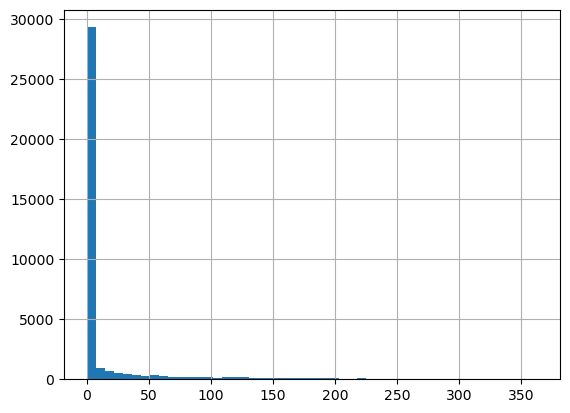

In [276]:
# Creating a histogram
first_buy['first_purchase_days'].hist(bins=50) 

In [277]:
# Descriptive statistics
first_buy['first_purchase_days'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: first_purchase_days, dtype: float64

**Findings:**

The analysis of the time it takes for customers to make their first purchase after their first session reveals the following insights:

- Immediate Purchases:
    
    At least 50% of users make their first purchase on the same day as their first session, with both the median and the first quartile (25%) at 0 days. This indicates a strong tendency for immediate conversions.

- Rapid Conversion:

    75% of users complete their first purchase within 2 days of their first session. This suggests that most users make quick purchasing decisions, providing an opportunity for businesses to focus on this early conversion window.

- Outliers and Delayed Purchases:
    
    While the majority of users convert quickly, the maximum time to the first purchase is 363 days, with a small subset of users waiting almost a year before making their first purchase. These outliers highlight the importance of monitoring long-term user behavior.

- Average Time to Purchase:

    The mean time to the first purchase is 16.9 days, which is significantly higher than the median due to a small number of users taking much longer to convert.

- Data Skewness:

    The distribution is heavily right-skewed, reflecting that most users make purchases quickly while a few take significantly longer.

---

**Recommendations:**

- Leverage Immediate Conversions:

    Given that a majority of users make purchases within 2 days, marketing campaigns should focus on enhancing the user experience during this critical period. Offering limited-time promotions or personalized recommendations may boost conversions.

- Nurture Delayed Purchasers:

    For users who do not convert immediately, targeted follow-ups through email, push notifications, or remarketing campaigns could help reduce the time to purchase.

- Analyze Long-Delay Cases:
    
    Investigating the behavior of outliers with long purchase delays may reveal insights into potential friction points or special user segments that require tailored strategies.

By leveraging these findings, businesses can refine their acquisition and retention strategies to maximize user conversions and improve overall revenue.

#### How many orders do they place over time? <a id='penjualan2'></a>

To understand customer purchasing behavior, we first extracted specific time-related attributes from the `orders` dataset.

In [278]:
# Review the `orders` dataset
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [279]:
# Extract specific time-related information from the data

# Extract date information
orders['buy_date'] = orders['buy_ts'].dt.date

# Extract week information
orders['buy_week']  = orders['buy_ts'].values.astype('datetime64[W]')

# Extract month information
orders['buy_month'] = orders['buy_ts'].values.astype('datetime64[M]')

# Extract year information
orders['buy_year']  = orders['buy_ts'].values.astype('datetime64[Y]')

In [280]:
# Review the dataset again
orders.head()

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01


Next, we created a new dataset to analyze the monthly transaction count and total revenue.

In [281]:
# Create an aggregated dataset
orders_agg = orders.groupby('buy_month').agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})

# Rename the columns
orders_agg.columns = ['transaction_count', 'revenue_sum']

In [282]:
# Review the dataset
orders_agg

,transaction_count,revenue_sum
buy_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


The revenue and transaction counts were visualized to observe trends over time.

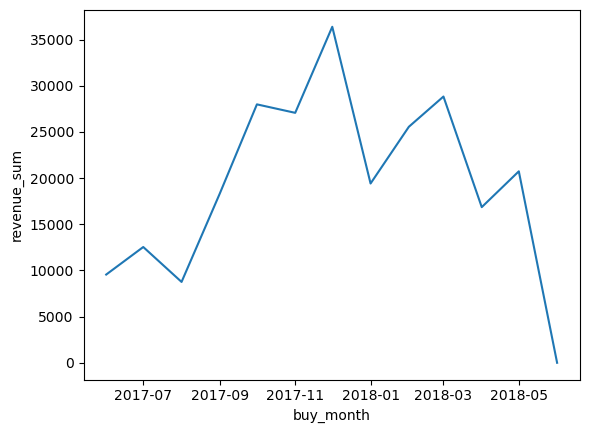

In [283]:
# Create a revenue graph
sns.lineplot(orders_agg['revenue_sum']);

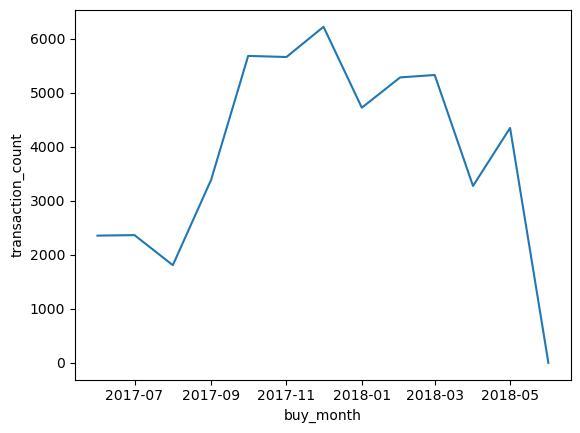

In [284]:
# Create a `transaction_count` graph
sns.lineplot(orders_agg['transaction_count']);

To summarize the data, descriptive statistics were calculated for both metrics.

In [285]:
# Calculate descriptive statistics
orders_agg.describe()

,transaction_count,revenue_sum
count,13.000000,13.000000
mean,3878.076923,19389.015385
std,1858.113401,9962.071481
min,1.000000,3.420000
25%,2363.000000,12539.470000
50%,4346.000000,19417.130000
75%,5326.000000,27069.930000
max,6218.000000,36388.600000


**Findings:**

1. Revenue Trend:

    - The **average monthly** revenue is approximately **19,389.02** with a standard deviation of **9,962.07**, indicating some variability in monthly earnings.
    - The **highest revenue** was observed in **December 2017** (36,388.60), suggesting strong sales during the holiday season.
    - Revenue shows a **steady increase from June 2017 to December 2017**, followed by fluctuations in early 2018. A **significant drop** is observed in **June 2018**, likely indicating incomplete or anomalous data for that month.

2. Transaction Trend:

    - The **average monthly transaction** count is around **3,878.08**, with a standard deviation of **1,858.11**, reflecting some variability in customer activity.
    - The **highest transaction** count occurred in **December 2017** (6,218), aligning with the peak revenue month, highlighting the impact of higher customer activity.
    - A similar growth pattern is observed in transactions, increasing steadily until late 2017 and then fluctuating throughout 2018, mirroring the revenue trend.

3. Key Observations:

    - December 2017 marks the peak in both revenue and transactions, likely influenced by holiday shopping or promotional campaigns.
    - Both metrics experience significant drops in June 2018, which could either be due to a decline in customer activity or incomplete data for that month.
    - The correlation between revenue and transactions suggests a direct relationship, where higher transaction counts drive higher revenues.

---

**Recommendations:**

1. **Capitalize on High-Activity Periods (e.g., December):**
   - **Holiday Promotions:** Since December consistently shows the highest revenue and transaction count, implement targeted marketing campaigns, discounts, or special holiday bundles to maximize sales.
   - **Early Planning:** Start promotions early in Q4 to build momentum leading into December, ensuring inventory and resources are optimized for peak demand.

2. **Analyze and Address Drop in June 2018:**
   - **Data Validation:** Verify if the drop in June is due to incomplete data or an actual decline in customer activity.
   - **Engagement Campaigns:** If the drop is real, consider launching campaigns like mid-year sales or loyalty rewards programs in June to stimulate customer engagement.

3. **Leverage Consistent Growth Periods (Q3 and Q4 of 2017):**
   - **Sustained Marketing:** Replicate successful marketing strategies from late 2017 to drive similar results in future years.
   - **Customer Retention:** Engage customers acquired during these periods with personalized follow-ups and offers to increase their lifetime value.

4. **Optimize for High Transaction Months:**
   - **Operational Efficiency:** Ensure logistics, staffing, and inventory are prepared to handle increased demand during peak months like December.
   - **Upselling and Cross-Selling:** During high-transaction months, encourage customers to purchase complementary products or upgrade to higher-value items.

5. **Evaluate Revenue per Transaction:**
   - **Increase Average Purchase Value:** Analyze transaction data to identify opportunities to increase the average purchase value, such as bundling products, offering tiered discounts, or introducing premium options.
   - **Loyalty Programs:** Reward repeat customers with exclusive deals or cashback offers to boost both transaction frequency and average revenue per customer.

6. **Plan for Revenue Fluctuations in Early 2018:**
   - **Predictive Modeling:** Use historical trends to predict sales dips and plan targeted campaigns to smooth out revenue fluctuations.
   - **Customer Reactivation:** Reach out to inactive customers with reactivation campaigns during low-activity months.

By implementing these strategies, the business can maximize revenues during high-demand periods, address low-demand months effectively, and improve overall customer engagement and lifetime value.

#### What is the average purchase value? <a id='penjualan3'></a>

To determine the average purchase value, we calculate the mean of the `revenue` column in the `orders` dataset:

In [286]:
# Calculate the average purchase value
print('The average purchase value is:', round(orders['revenue'].mean()))

The average purchase value is: 5


**Findings:**

The average purchase value per user is **5**.

#### How much revenue do they contribute? (LTV) <a id='penjualan4'></a>

In [287]:
# Review the first_orders dataset
first_orders.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


To analyze the Lifetime Value (LTV) of customers, the following steps were performed:

In [288]:
# Create a cohort dataset based on the first purchase
cohort_sizes = first_buy.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns= ['first_buy_month', 'n_buyers']

In [289]:
# Display the cohort dataset
cohort_sizes

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


A new dataset, `cohort_sizes`, was created, containing the first purchase month of users and the number of buyers.

Next, a second dataset was created to aggregate data based on the first purchase month, subsequent months, and revenue:

In [290]:
# Add the first purchase month
cohorts = orders.merge( first_buy, how='inner', on='uid')
cohorts_agg = cohorts.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

In [291]:
# Display the aggregated cohort dataset
cohorts_agg.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


The cohort age in months was then calculated:

In [292]:
# Calculate the cohort age in months
cohorts_agg['age_month'] = (cohorts_agg['buy_month'] - cohorts_agg['first_buy_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month'] / 30, 0).astype('int')

In [293]:
# Display the dataset with cohort age
cohorts_agg.head()

,first_buy_month,buy_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4


The datasets `cohort_sizes` and `cohorts_agg` were then merged:

In [294]:
# Merge the datasets
cohort_reports = cohort_sizes.merge(cohorts_agg, on= 'first_buy_month')

The formula for Lifetime Value (LTV) is:

**LTV = Gross Profit (GP) / n_buyers**

Since the margin rate to calculate Gross Profit is not available, Revenue was used as a substitute for GP in this analysis.

In [295]:
# Calculate LTV
cohort_reports['ltv'] = cohort_reports['revenue'] / cohort_reports['n_buyers']

In [296]:
# Display the results
cohort_reports.head()

,first_buy_month,n_buyers,buy_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


The cohort analysis and cumulative LTV were visualized:

In [297]:
# Create a cohort analysis report
cohorts_ltv = cohort_reports.pivot_table(
    index='first_buy_month',
    columns='age_month',
    values='ltv',
    aggfunc='mean'
).cumsum(axis=1)

In [298]:
# Display the LTV cohort table
cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


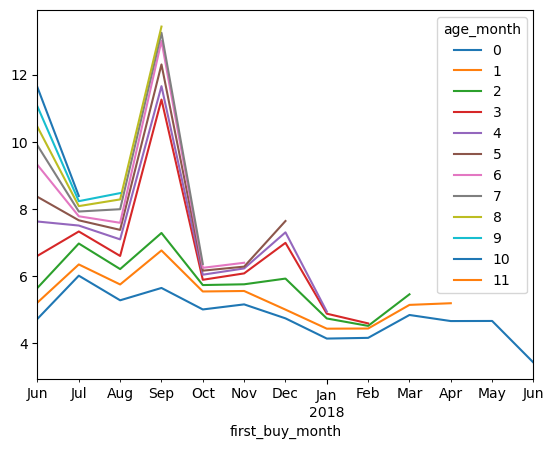

In [299]:
# Plot the cumulative LTV
cohorts_ltv.plot();

**Findings:**

1. **Peak LTV Performance in September 2017 Cohort**:
   - The cohort from **September 2017** shows the highest cumulative LTV, reaching **13.44** by its 8th month. This indicates strong purchasing behavior and retention during this period, likely driven by a specific event, campaign, or seasonality.

2. **Consistent Growth Across Cohorts**:
   - Most cohorts demonstrate gradual growth in LTV over time, especially during their first six months. This suggests that users tend to generate more revenue as their relationship with the platform matures.

3. **Declining LTV for Newer Cohorts**:
   - Starting with the **January 2018 cohort**, the cumulative LTV values are lower compared to earlier cohorts, with the January 2018 cohort reaching only **4.94** by its 4th month. This downward trend continues for the newer cohorts (e.g., February, March, and April 2018).

4. **Plateau in Growth for Some Cohorts**:
   - Cohorts like **October 2017** and **November 2017** exhibit LTV growth that slows down significantly after 5-6 months, reaching values around **6.24** and **6.40**, respectively. This plateau suggests a limit to customer spending or retention after the initial engagement phase.

5. **Short LTV Growth for June 2018 Cohort**:
   - The most recent cohort, **June 2018**, has the lowest cumulative LTV of **3.42**, reflecting minimal engagement due to its short observation period.

6. **Early High LTV for July 2017 Cohort**:
   - The **July 2017 cohort** starts with a higher initial LTV of **6.01** and grows steadily, reaching **8.39** by its 10th month. This indicates effective engagement strategies early in the customer lifecycle during this period.

7. **Seasonality Impacts**:
   - The spikes observed in cohorts such as **September 2017** and steady increases in earlier cohorts might be indicative of seasonal campaigns or promotions that successfully drove user activity and revenue.

---

**Recommendations:**

- The decline in LTV for newer cohorts might indicate a need to evaluate and improve customer retention strategies, engagement campaigns, or onboarding processes.
- The high LTV values for earlier cohorts suggest replicable strategies or conditions that were effective at retaining and monetizing users. Identifying these factors can inform future efforts to replicate success.
- The plateau in growth for some cohorts calls for initiatives to re-engage customers after the initial engagement period, potentially through loyalty programs or targeted offers.

### Marketing Analysis <a id='pemasaran'></a>

The following steps and metrics will be analyzed for marketing:

- How much money is spent overall and per source?
- What is the Customer Acquisition Cost (CAC) for each source?
- How profitable is the investment? (ROMI)

#### How much money is spent overall and per source? <a id='pemasaran1'></a>

This section calculates the total amount of money spent, the amount spent over time, and the amount spent by source.

First, calculate the total overall spending:

In [300]:
# Reviewing the `costs` dataset
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [301]:
# Calculating the total costs
print('Total Costs {}'.format(costs['costs'].sum()))

Total Costs 329131.62


The total amount of money spent is **329131.62**.

Next, calculate and visualize the monthly spending trend:

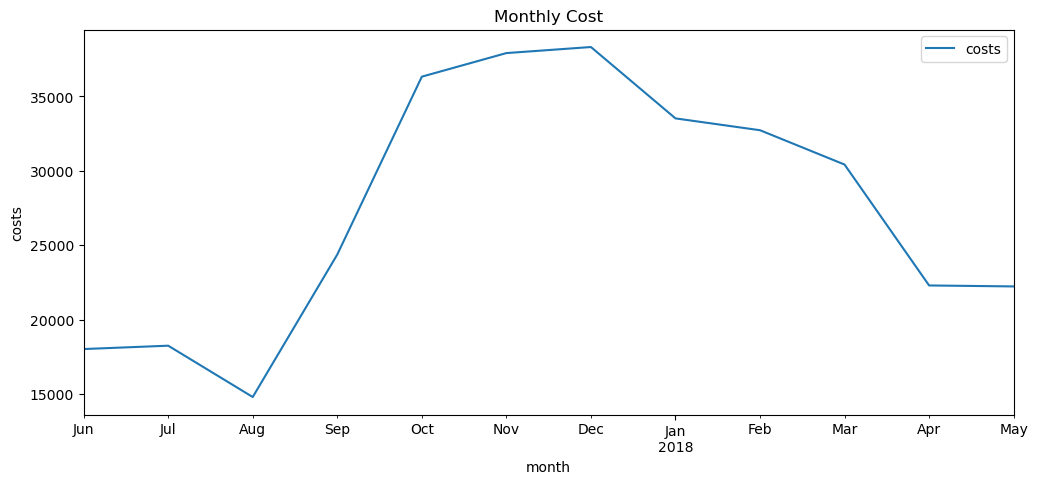

In [302]:
# Calculating monthly costs
costs['costs_month'] = costs['dt'].values.astype('datetime64[M]')

costs.pivot_table(index='costs_month',
    values='costs', aggfunc='sum').plot(figsize=(12,5), title='Monthly Cost', xlabel='month', ylabel='costs')
plt.show()

Finally, calculate the total amount spent by each source and visualize the breakdown:

In [303]:
# Calculating costs by source
costs.groupby('source_id').agg({'costs':'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


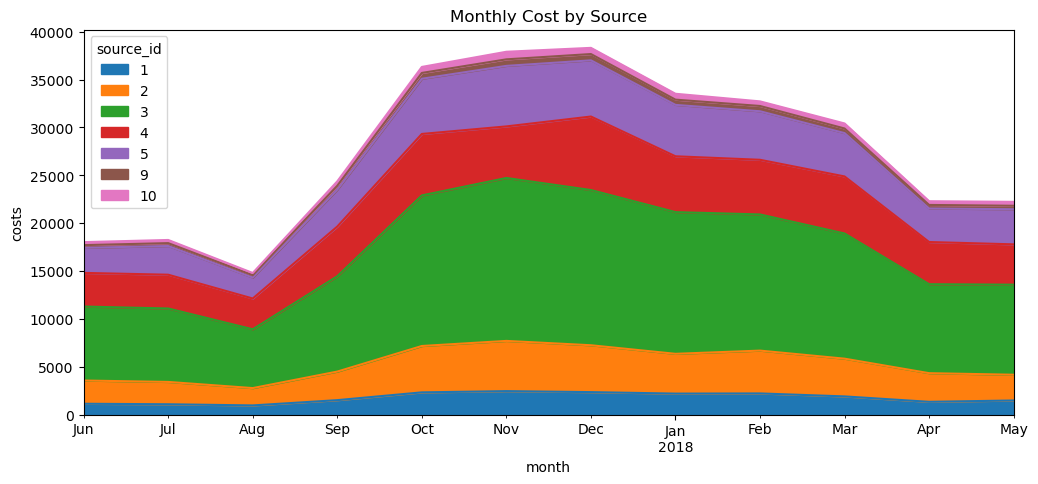

In [304]:
# Creating the graph
costs.pivot_table(index='costs_month', columns='source_id',
    values='costs', aggfunc='sum').plot.area(figsize=(12,5), title='Monthly Cost by Source', xlabel='month', ylabel='costs')
plt.show()

**Findings:**

1. **Source-Wise Spending Overview**  
   Based on the provided cost breakdown by source, the distribution of marketing expenditure is as follows:  
   - **Source 3** is the highest contributor, with spending of **141,321.63**, accounting for **43%** of the total costs.
   - **Source 4** follows with **61,073.60**, making up **19%** of the total costs.
   - **Source 5** comes next with **51,757.10**, representing **16%** of the total costs.
   - **Source 2** accounts for **42,806.04** or **13%** of the total costs.
   - **Source 1** has the lowest of the main channels, spending **20,833.27** or about **6%**.
   - The smaller contributors, **Source 9** and **Source 10**, have minimal spending of **5,517.49** and **5,822.49**, respectively, totaling less than **3%** combined.

2. **High Expenditure on Source 3**

    Source 3 accounts for **43%** of total marketing costs, making it the most significant contributor.

3. **Significant Spending on Sources 4 and 5**

    These sources collectively represent **35%** of the total costs, indicating they are key secondary acquisition channels.  

4. **Low Investment in Sources 1, 9, and 10**

    Combined, these sources account for less than **10%** of total spending, suggesting either lower importance or limited scalability.  

---

**Recommendations:**  

1. **Prioritize ROI Analysis for Source 3**

    Evaluate the efficiency of Source 3 to ensure its performance justifies the high investment. Consider reallocating part of its budget if it underperforms.  

2. **Optimize Secondary Channels (Sources 4 and 5)**

    Investigate whether increased spending on these channels could yield better returns and reduce dependency on Source 3. 

3. **Experiment with Low-Budget Sources**

    Test small increases in investment for Sources 1, 9, and 10 to explore potential growth opportunities.  

4. **Diversify Spending**

    Reduce reliance on Source 3 by distributing costs more evenly across other high-performing channels.  

5. **Link Costs to Customer Metrics**

    Perform a detailed analysis connecting costs to LTV and CAC for each source to better assess overall profitability and effectiveness.  

#### What is the Customer Acquisition Cost (CAC) for each source? <a id='pemasaran2'></a>

To calculate the Customer Acquisition Cost (CAC), the marketing expenses incurred to acquire new customers need to be divided by the number of new customers acquired within a certain time period.

Formula for Calculating CAC:

**CAC = Total Marketing Expenses / Number of New Customers**

Then we need marketing costs from the `costs` dataset and customer numbers from the `orders` dataset.

Calculate the Overall CAC:

In [305]:
# Review the `costs` dataset
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [306]:
# Review the `orders` dataset
orders.head()

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01


In [307]:
# Calculate the overall CAC
print('The overall CAC is:', round(costs['costs'].sum() / orders['uid'].nunique(), 2))

The overall CAC is: 9.01


**Result:**

The overall Customer Acquisition Cost (CAC) is **9.01**.

Identify the Source ID for Each User:

In [308]:
# Review the `visits_merge` dataset
visits_merge.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,0


In [309]:
# Retrieve the source ID information for each user
buyers = visits_merge.sort_values('session_start').groupby('uid').first()
buyers = buyers[['source_id']]

In [310]:
# Review the result
buyers.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


Merge the `buyers` Dataset with `first_buy`:

In [311]:
# Review the `first_buy` dataset
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [312]:
# Merge the `buyers` dataset with `first_buy`
buyers = pd.merge(first_buy, buyers, left_on='uid', right_index=True)
buyers.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days,source_id
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0,10
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0,3
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0,5


Calculate the Number of New Customers by Source:

In [313]:
# Calculate the daily number of new customers
buyers_daily = buyers.groupby(['source_id', 'first_buy_date']).agg({'uid': 'count'}).reset_index()

# Rename the columns
buyers_daily.rename(columns={'uid':'n_buyers'}, inplace=True)

# Fix the data types
buyers_daily['first_buy_date'] = pd.to_datetime(buyers_daily['first_buy_date'])

In [314]:
# Review the result
buyers_daily.head()

,source_id,first_buy_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


Finally, merge the `buyers_daily` Dataset with `costs` and calculate the CAC:

In [315]:
# Merge the datasets
costs_merge = buyers_daily.merge(costs, left_on=['source_id', 'first_buy_date'], right_on=['source_id', 'dt'])

# Calculate CAC
costs_merge['cac'] = costs_merge['costs'] / costs_merge['n_buyers']

# Calculate the average CAC by source
costs_merge.groupby('source_id').agg({'cac' : 'mean'}).round(2)

,cac
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


**Findings:**

Based on the CAC (Customer Acquisition Cost) calculations for each source:  

1. **Source 2 (CAC = 16.29)** and **Source 3 (CAC = 15.58)** have the highest CAC, indicating these sources are the most expensive for acquiring new customers.  
2. **Source 9 (CAC = 6.84)** and **Source 10 (CAC = 6.56)** have the lowest CAC, making them the most cost-effective sources for acquiring customers.  
3. **Source 4 (CAC = 7.27)** and **Source 5 (CAC = 8.34)** also show relatively lower CAC compared to the average.  
4. The significant difference in CAC across sources indicates variability in marketing efficiency depending on the source.  

---

**Recommendations:**

1. **Focus on Cost-Effective Sources**:  
   Increase investments in **Source 9** and **Source 10**, as they demonstrate the lowest CAC, potentially leading to higher ROI (Return on Investment).  

2. **Review High-Cost Sources**:  
   - Reevaluate the marketing strategies for **Source 2** and **Source 3** to understand why their CAC is significantly higher.  
   - Consider renegotiating terms with these platforms or reducing budget allocation unless they generate high-value customers.  

3. **Analyze Conversion Rates**:  
   Investigate whether the higher CAC from **Source 2** and **Source 3** results in more loyal or higher-spending customers. If not, reallocating funds to more cost-efficient sources might be more beneficial.  

4. **Experiment with Channels**:  
   - Conduct A/B testing to optimize ad campaigns across all sources.  
   - Consider exploring alternative marketing channels to diversify and lower acquisition costs.  

5. **Optimize Campaigns**:  
   Focus on refining targeting criteria and improving ad creatives for high-CAC sources to potentially lower acquisition costs over time.  

#### How profitable is the investment? (ROMI) <a id='pemasaran3'></a>

ROMI (Return on Marketing Investment) is a metric to evaluate the success of a marketing campaign. 

The formula for calculating ROMI is:

**ROMI = LTV / CAC**

To compute ROMI, we will use the CAC data from the `costs_merge` dataset and the LTV data from the `cohort_reports` dataset.

In [316]:
# Viewing the `costs_merge` dataset
costs_merge.head()

,source_id,first_buy_date,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


In [317]:
# Viewing the `cohort_reports` datase
cohort_reports.head()

,first_buy_month,n_buyers,buy_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


We will calculate ROMI and add it as a new column in the `cohort_reports` dataset.

In [318]:
# Calculating ROMI
cohort_reports['romi'] = cohort_reports['ltv'] / costs_merge['cac']

# Creating a cohort analysis for ROMI and calculating the cumulative sum over time
cohort_romi = cohort_reports.pivot_table(
    index='first_buy_month', columns='age_month', values='romi', aggfunc='mean'
).cumsum(axis=1)

In [319]:
# Displaying the cohort analysis for ROMI
cohort_romi.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.88,0.93,1.02,1.07,1.39,1.72,2.07,2.28,2.47,2.48,2.53,2.56
2017-07-01,1.37,1.4,1.45,1.47,1.47,1.48,1.51,1.52,1.53,1.56,1.66,
2017-08-01,0.24,0.27,0.31,0.38,0.47,0.52,0.62,0.68,0.74,0.76,,
2017-09-01,2.04,2.38,2.42,2.67,2.7,2.85,2.94,2.94,2.98,,,
2017-10-01,0.71,0.74,0.75,0.79,0.82,0.83,0.85,0.88,,,,
2017-11-01,0.49,0.52,0.54,0.59,0.61,0.62,0.63,,,,,
2017-12-01,1.13,1.16,1.4,1.42,1.46,1.49,,,,,,
2018-01-01,0.72,0.74,0.83,0.86,0.87,,,,,,,
2018-02-01,0.21,0.25,0.26,0.27,,,,,,,,


Finally, we will visualize the ROMI data using a heatmap to analyze how ROMI changes over time for each cohort.

<Axes: title={'center': 'ROMI'}, xlabel='age_month', ylabel='first_buy_month'>

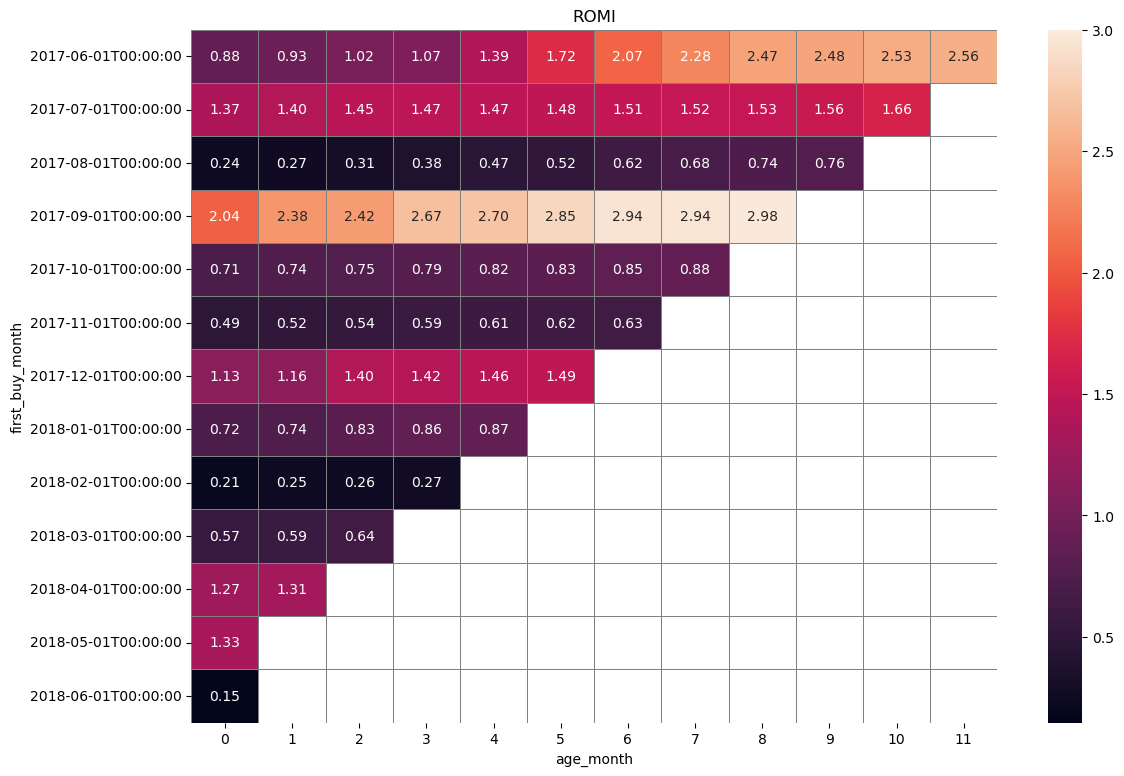

In [320]:
# Creating a heatmap to visualize the ROMI data
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
    cohort_romi,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    linecolor='grey',
    vmax=3
) 

**Findings:**

1. **Cohort ROMI Progression**:
   - The cohort from **September 2017** is the most profitable, achieving a ROMI of **2.98** within 8 months, indicating a highly successful marketing campaign during this period.
   - Other cohorts like **June 2017** also show strong performance, achieving a ROMI of **2.56** within 11 months.
   - Some cohorts, such as **August 2017**, show slower growth in ROMI, only reaching **0.76** after 9 months.

2. **Break-Even Analysis**:
   - Several cohorts (e.g., **June 2017**, **September 2017**) reached a ROMI above 1 within the first few months, indicating that the marketing investments for these cohorts were quickly recouped.
   - Cohorts such as **November 2017** and **March 2018** struggled to break even, with ROMI remaining below 1 over the observed period.

3. **Seasonal Trends**:
   - Cohorts from the later months (e.g., **December 2017**, **January 2018**) show moderate ROMI growth, suggesting potential seasonal factors influencing customer behavior or marketing performance.

---

**Recommendations:**

1. **Reinvest in Successful Strategies**:
   - Analyze the marketing strategies used for the **September 2017** and **June 2017** cohorts and replicate or enhance these approaches in future campaigns to maximize profitability.

2. **Improve Underperforming Cohorts**:
   - Investigate the campaigns for cohorts like **August 2017** and **November 2017** to identify reasons for slower ROMI growth. Focus on optimizing ad targeting, refining campaign messages, or revising the budget allocation.

3. **Seasonal Campaign Adjustments**:
   - Review campaigns launched during late 2017 and early 2018 to identify opportunities to improve performance during similar periods in the future. Consider timing discounts, promotions, or new product launches strategically.

4. **Focus on Fast Break-Even Strategies**:
   - Prioritize strategies that help cohorts reach ROMI > 1 quickly, as seen with **September 2017**. This will improve cash flow and overall marketing ROI.

## Analysis Summary <a id='end'></a>

The dataset analyzed includes data on visits, orders, and expenditures. During the preprocessing stage, column names were standardized to lowercase and formatted using Snake Case. An anomaly was identified where two rows had a `session_start` timestamp later than the `session_end` timestamp. This inconsistency, which contradicts logical expectations, was addressed by removing the anomalous rows.  

The primary goal of this analysis was to determine the most optimal marketing sources using three main metrics: product usage, sales performance, and marketing effectiveness.  

**Key Metrics and Insights**  

1. Product Usage  
- **Daily, Weekly, and Monthly Active Users:**  
  - **Daily active users (DAU):** 907 users  
  - **Weekly active users (WAU):** 5,825 users  
  - **Monthly active users (MAU):** 23,228 users  

  These figures provide a clear view of user engagement. The steady daily, weekly, and monthly activity levels highlight an opportunity to strengthen user loyalty and attract new users by enhancing features and functionalities.  

- **Number of Sessions per Day:**  
  On average, each user initiates one session per day.  

- **Session Duration:**  
  - Average session duration: **643 seconds**  
  - Median session duration: **300 seconds**  
  - Mode session duration: **60 seconds**  

  These insights reveal patterns in user engagement. The company could leverage this data to improve the user experience and increase session duration through better design and functionality.  

- **Retention Rates:**  
  Monthly user retention declines significantly over time.  
  - **Month 1:** 100% (baseline)  
  - **Month 2:** 5.36%  
  - **Month 12:** 2.05%  

  These findings emphasize the need for enhanced retention strategies. Companies should focus on feature updates, improved product quality, and attractive promotions to sustain long-term user engagement.  

2. Sales Performance  
- **Purchase Timing:**  
  - Most users make their first purchase on **Day 0** (same day as their first session).  
  - Average time to first purchase: **16 days**  
  - Minimum time: **0 days**  
  - Maximum time: **363 days**  

  This highlights a broad range in purchase behavior, suggesting the need for diverse strategies to engage both fast and slow buyers.  

- **Monthly Orders:**  
  Order volumes exhibit significant fluctuations. For example:  
  - **October 2017:** Sharp increase from ~3,400 to 5,679 orders (likely due to promotions).  
  - Decline from November 2017 to February 2018, with growth resuming afterward.  
  - An anomaly in **June 2018**, with only one order recorded.  

  Deeper analysis is needed to understand and address these fluctuations.  

- **Average Order Value (AOV):**  
  The average order value is **5**.  

- **Customer Lifetime Value (LTV):**  
  - **June 2017 cohort:** Highest LTV of **11.88** at Month 11.  
  - Other cohorts show lower LTV trends. The **September 2017 cohort** reached an LTV of **11.26** at Month 3 but declined significantly thereafter.  

  These results suggest declining customer engagement over time, emphasizing the importance of strategies to increase customer lifetime value.  

3. Marketing Effectiveness  
- **Total Marketing Spend:**  
  The total marketing expenditure was **329,131.62**, with **Source 3** having the highest spend at **141,321.63**.  
  - Sources **1**, **4**, and **5** had moderate spending (~20,000–60,000).  
  - Sources **9** and **10** had the lowest spending (~5,500).  

- **Customer Acquisition Cost (CAC):**  
  - Lowest CAC: Source **10** (**6.56**) and Source **9** (**6.84**).  
  - Highest CAC: Source **2** (**16.29**).  

  Focusing on low-CAC sources can optimize acquisition costs and improve overall profitability.  

- **Return on Marketing Investment (ROMI):**  
  - **June 2017 cohort:** ROMI peaked at **2.56** by Month 11.  
  - Subsequent cohorts showed decreasing ROMI over time, with some early improvements but overall downward trends.  
  - **September 2017 cohort:** Strong ROMI of **2.98** at Month 8, highlighting a highly successful campaign.  

---

**General Recommendations:**

1. **Retention Strategy**  
   - Develop retention programs, such as loyalty incentives, personalized marketing, and targeted campaigns to retain users over the long term.  
   - Introduce gamification or engagement-driven features to encourage repeated usage.  

2. **Optimize Marketing Spend**  
   - Allocate budgets to sources with lower CAC and higher ROMI, such as **Sources 9 and 10**.  
   - Review underperforming sources to identify inefficiencies and adjust campaigns accordingly.  

3. **Increase Lifetime Value**  
   - Offer personalized upselling or cross-selling opportunities.  
   - Implement targeted campaigns to engage cohorts showing declining LTV.  

4. **Promote Faster Conversions**  
   - Encourage purchases on Day 0 through attractive welcome offers or limited-time discounts.  
   - Develop campaigns to accelerate conversions for users who delay purchases.  

5. **Address Seasonal Trends**  
   - Leverage the insights from October 2017’s performance to replicate successful promotional strategies during peak periods.  

---

This project provided a comprehensive analysis of user behavior, sales performance, and marketing efficiency, offering actionable insights to drive business growth. By addressing user retention, optimizing marketing strategies, and focusing on high-performing campaigns, the company can improve its overall profitability and sustain long-term success. Future analysis should delve deeper into user behavior patterns and external factors influencing sales to uncover additional opportunities for growth.  

[Return to table of contents](#back)